# Initial Setup
Load data from "music_genre.csv" in folder using pandas. Save the data frame back to SQLite; leveraging mostly SQL for analysis. Plot items using pyplot from matlab.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# read csv
music_genre = pd.read_csv('music_genre.csv')

# create an in-memory sqlite database and save the data frame to it
conn = sqlite3.connect(":memory:")
music_genre.to_sql(name='music', con=conn)
cur = conn.cursor()

# grab danceability, popularity, and key from the table we just created
cur.execute('SELECT danceability, popularity, key FROM music')
result = cur.fetchall()

danceability = []
popularity = []
song_key = []

# iterate over the rows return and account for NULLs in the results
for row in result:
    item_dancebility = row[0]
    if item_dancebility is None:
        danceability.append(0)
    else: 
        danceability.append(item_dancebility)
    item_pop = row[1]    
    if item_pop is None:
        popularity.append(0)
    else:
        popularity.append(item_pop)
    item_key = row[2]
    if item_key is None:
        song_key.append("?")
    else:
        song_key.append(item_key)

# Danceability versus Song Key


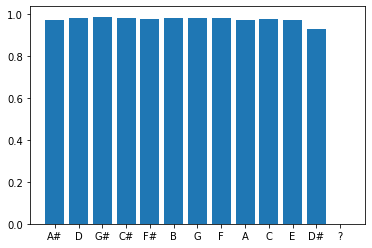

In [29]:
plt.bar(song_key, danceability)
plt.show()

# Popularity versus Song Key


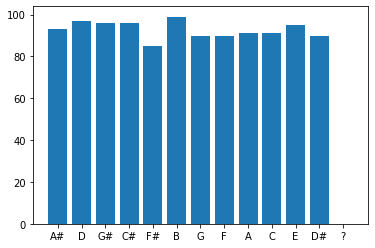

In [25]:
plt.bar(song_key, popularity)
plt.show()